In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [2]:
dfMain = pd.read_csv('main.csv', low_memory=False);
#Loads 'main.csv'

In [3]:
dfMain = dfMain.filter(['mainid','brgy','totin']);
# Filters the dataframe to show only the relevant columns for this scoring phase

dfMain

,mainid,brgy,totin
0,1061066,186,176208.0
1,555683,69,204500.0
2,8611889,1,360000.0
3,299398,165,96000.0
4,136921,135,115200.0
5,3842267,43,210000.0
6,899855,201,45000.0
7,235953,190,540000.0
8,1591438,47,132208.0
9,1053432,130,236000.0


In [4]:
# if(x < 42000 and x > 10000):
# income_score = (x-10000) / 32000
for i, row in dfMain.iterrows():
    theScore = 0
    if (row['totin'] >= 42000) :
        dfMain.at[i,'theScore'] = 1.0
    elif (row['totin'] <= 10000) :
        dfMain.at[i,'theScore'] = 0.0
    elif (row['totin'] < 42000 and row['totin'] > 10000) :
        dfMain.at[i,'theScore'] = (row['totin'] - 10000) / 32000


dfMain

,mainid,brgy,totin,theScore
0,1061066,186,176208.0,1.0
1,555683,69,204500.0,1.0
2,8611889,1,360000.0,1.0
3,299398,165,96000.0,1.0
4,136921,135,115200.0,1.0
5,3842267,43,210000.0,1.0
6,899855,201,45000.0,1.0
7,235953,190,540000.0,1.0
8,1591438,47,132208.0,1.0
9,1053432,130,236000.0,1.0


In [5]:
arrayBrgyScores = dfMain.groupby('brgy')['theScore'].mean()

#Bottom20
arrayBrgyScoresbot20 = dfMain.groupby('brgy')['theScore'].mean().reset_index()
arrayBrgyScoresbot20 = arrayBrgyScoresbot20.sort_values('theScore').head(10)
arrayBrgyScoresbot20

,brgy,theScore
84,99,0.765625
80,94,0.846051
123,149,0.860987
129,155,0.872314
60,68,0.877976
70,80,0.887500
133,159,0.893519
71,81,0.908181
81,95,0.917323
67,77,0.918953


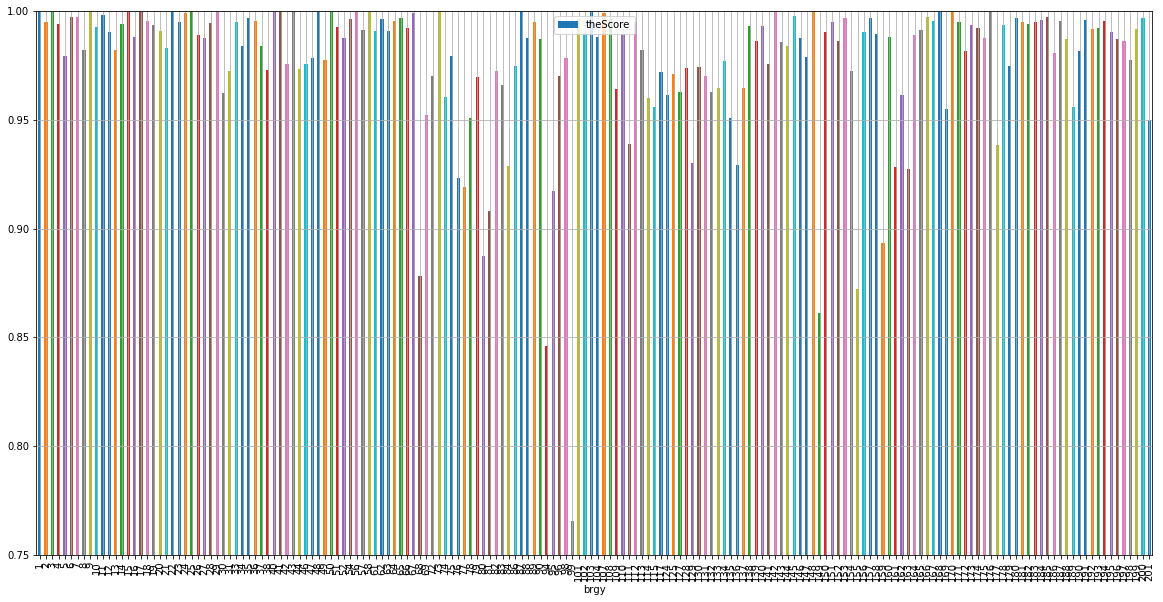

In [6]:
arrayBrgyScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.ylim(0.75, 1)
plot.legend()
plot.show()

# As can be seen from the bottom 20 table, the lowest score is 0.765625 of Brgy 84.
# So to better illustrate the data we set 0.75 as the bottom y-axis value

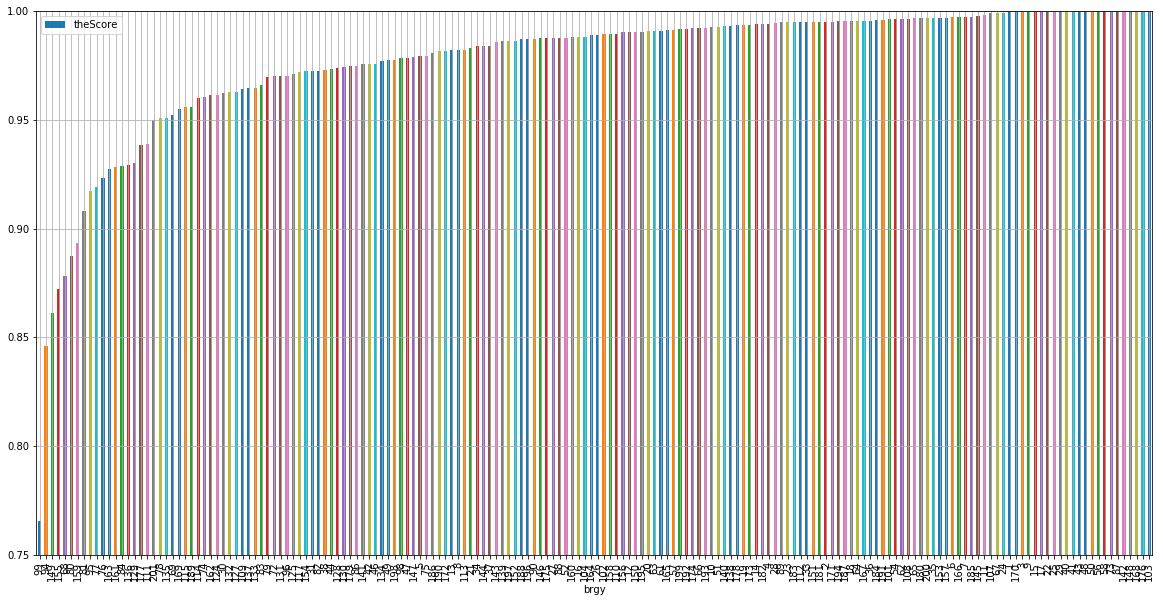

In [7]:
arrayBrgyScores.sort_values().plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.ylim(0.75, 1)
# As can be seen from the bottom 20 table, the lowest score is 0.765625 of Brgy 84.
# So to better illustrate the data we set 0.75 as the bottom y-axis value
plot.legend()
plot.show()

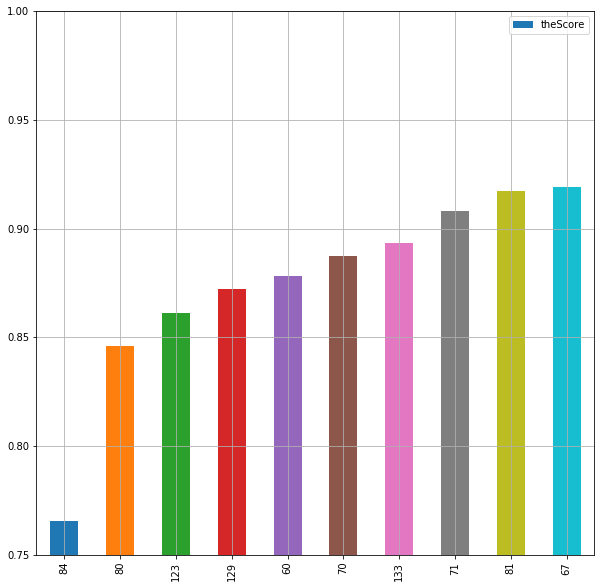

In [8]:
# Looking at the scores dataframe, the top 10 (and more) brgys all have perfect scores and so we don't need to illustrate
# for there is no difference between those brgys.

# Below is the graph for the bottom 10 which have considerable difference in value.
arrayBrgyScoresbot20['theScore'].plot(figsize=(10, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.ylim(0.75, 1)
plot.legend()
plot.show()

In [9]:
dfScore4 = pd.DataFrame(arrayBrgyScores);
dfScore4.to_csv('BrgyScore5.csv', encoding='utf-8')
# Saves the score data into a CSV file so we can load it in the FINAL scoring notebook

# Calamity Prep Score 5: The Mean Financial Status of Each Barangay

### Assumptions:
1. According to an article by Malasig (2018), having a 42,000 PHP worth of monthly salary is needed in order to have a comfortable and sustainable family life. She also stated that only having 10,000 PHP worth of monthly salary will render a family being close to the poverty line. Therefore, we assumed that 42,000 PHP of total income is the required amount in order to assure survival in the midst of a typhoon calamity. Then, 10,000 PHP of total income would be the baseline of our 'failure' rating. Anything in between will be calculated using a mathematical method and will be explained in our methodology. 

### Methodology:
1. Created a filtered dataframe copy of the original Main.CSV file that only contains the relevant variables for Score 5.

2. For each total income recorded per family, the amount will be scored based from our assumptions thus, anything more than or equal to 42,000 will be scored as 1 and any amount less than or equal to 10,000 will be scored as 0. The scoring for any amount in between the mentioned values will be calculated using by getting the limit of a function.

    income_score = (x - 10000) / 32000

#### References
    Malasig, J. (2018, June 11). Surviving versus living: The Filipino family’s monthly budget. Retrieved December 8, 2018, from
        http://www.interaksyon.com/breaking-news/2018/06/11/128411/filipino-family-basic-
        monthly-income-p42000-or-p10000/fbclid=IwAR16vletTB5AIRzssWyPVDDuMutDa7NPMrHw9sztIMuhTo_JqdZSXpw_Hwc